In [6]:
from ultralytics import YOLO
from PIL import Image
from matplotlib import pyplot
%matplotlib inline

# Load a pretrained YOLOv8n model
model = YOLO('/Data4/student_zhihan_data/source_code/yolo/ultralytics/runs/detect/GC10-DET_brightness_0 detect by yolov8n with dropout(p=0.1)/weights/best.pt')

# Define path to the image file
source = '/Data4/student_zhihan_data/data/GC10-DET/test/images/img_01_425005700_00555_jpg.rf.e1a20fb84e9af76157c2685f2d822bfe.jpg'

# Run inference on the source
results = model(source, device=[0,1,2,3])  # list of Results objects


image 1/1 /Data4/student_zhihan_data/data/GC10-DET/test/images/img_01_425005700_00555_jpg.rf.e1a20fb84e9af76157c2685f2d822bfe.jpg: 640x640 1 silk_spot, 8.1ms
Speed: 1.5ms preprocess, 8.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


In [7]:
for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
boxes.data

tensor([[2.6559e+02, 5.9617e+00, 4.1354e+02, 6.1224e+02, 4.2320e-01, 6.0000e+00]], device='cuda:0')

tensor([[2.4922e+02, 9.5259e+00, 4.3685e+02, 6.3822e+02, 5.8430e-01, 6.0000e+00],
        [2.5220e+02, 4.9125e+00, 3.9663e+02, 5.6047e+02, 3.1145e-01, 6.0000e+00]], device='cuda:0')

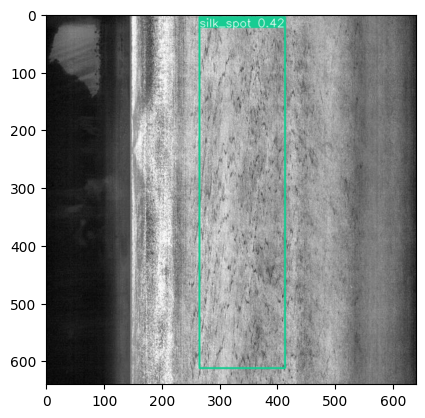

In [8]:
# Show the results
for r in results:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    # plot img
    pyplot.imshow(im_array)    

In [9]:
# system command cd to file directory
import os

In [10]:
for i in [-150,-100,-50,-30,-20,-10,10,20,30,50,60,70,90]:
    dataset = os.path.join(f'/Data4/student_zhihan_data/data/GC10-DET_brightness_{i}','data.yaml')
    command = f'yolo task=detect mode=train model=yolov8n.yaml data={dataset} epochs=1000 batch=16 imgsz=640 workers=8 name="GC10-DET_brightness_{i} detect by yolov8n with dropout(p=0.1)" verbose=False device=0,1,2,3 &'
    command = f'{dataset} GC10-DET_brightness_{i}_detect_by_yolov8n_with_dropout(p=0.1)'
    print('"'+command+'"')

"/Data4/student_zhihan_data/data/GC10-DET_brightness_-150/data.yaml GC10-DET_brightness_-150_detect_by_yolov8n_with_dropout(p=0.1)"
"/Data4/student_zhihan_data/data/GC10-DET_brightness_-100/data.yaml GC10-DET_brightness_-100_detect_by_yolov8n_with_dropout(p=0.1)"
"/Data4/student_zhihan_data/data/GC10-DET_brightness_-50/data.yaml GC10-DET_brightness_-50_detect_by_yolov8n_with_dropout(p=0.1)"
"/Data4/student_zhihan_data/data/GC10-DET_brightness_-30/data.yaml GC10-DET_brightness_-30_detect_by_yolov8n_with_dropout(p=0.1)"
"/Data4/student_zhihan_data/data/GC10-DET_brightness_-20/data.yaml GC10-DET_brightness_-20_detect_by_yolov8n_with_dropout(p=0.1)"
"/Data4/student_zhihan_data/data/GC10-DET_brightness_-10/data.yaml GC10-DET_brightness_-10_detect_by_yolov8n_with_dropout(p=0.1)"
"/Data4/student_zhihan_data/data/GC10-DET_brightness_10/data.yaml GC10-DET_brightness_10_detect_by_yolov8n_with_dropout(p=0.1)"
"/Data4/student_zhihan_data/data/GC10-DET_brightness_20/data.yaml GC10-DET_brightness_20